# QED Supergroup: Time Series Analysis with Python
### Taisa Kushner -- taisa.kushner(at)colorado(dot)edu
### March 2, 2020

If you'd like to follow along: 
- Go to https://nbviewer.jupyter.org/
- Type in https://github.com/tkushner/QEDtimeseries/blob/master/QEDsupergroup_timeseries.ipynb



## 0.0 Python & Jupyter

We will be using Python3. You should already have this installed.

If you'd like a nice, thorough introduction to Python, [please see this (free!) book](http://greenteapress.com/thinkpython2/thinkpython2.pdf)

### Let's first take a look at the editor "Jupyter Notebook" that we are using today.

The Jupyter Notebook:

- An open source web application
- To create and share documents that contain live code, equations, visualizations, and text
- Ships with the IPython kernel, supports over 100 other kernels (R, Julia, etc.)

Running Cells:

- A Notebook’s cell defaults to using code whenever you first create one
- Uses the kernel that you chose when you started your Notebook
- Started with Python 3 as kernel, one can write Python code in the code cells
- To execute a cell, you can just select the cell and click the Run button (keyboard press Shift+Enter)
- The primary cell types are the Code and Markdown cell types

Useful References:

- [Jupyter Cheatsheet](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf)
- [Python Cheatsheet](https://perso.limsi.fr/pointal/_media/python:cours:mementopython3-english.pdf)
- [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
- [Pandas Cheatsheet](https://assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf)





## 1.0 Data management with Pandas

Pandas is the open-source (under a [BSD license](https://opensource.org/licenses/BSD-2-Clause)) “Python data analysis library”, which has data structures and analysis tools geared towards analysis of numerical tables and time series. Within the world of data science, pandas is one of the most highly utilized tools due to how powerful and easy to work with the main data structure (the pandas datafame) is, especially compared to lists and dictionaries when your data comes in the form of a file (.csv, .txt, .tsv, etc). Additionally, pandas allows you to work on data sets without impacting database resources which is important if you have large data sets - more on this & related ramifications later. 

A note: you will find online that Pandas is designed to “fill this gap (in analysis and modeling), enabling you to carry out your entire data analysis workflow in Python”. In actuality, pandas is best suited for data analysis (preparation, cleaning, etc) rather than modeling, as the modeling capabilities are limited to linear and panel regression. Modules such as [numpy](https://numpy.org/), [scipy](https://www.scipy.org/), [statsmodels](https://www.statsmodels.org/stable/index.html) and [scikit-learn](https://scikit-learn.org/stable/), as well as software such as [Matlab](https://www.mathworks.com/solutions/mathematical-modeling.html) are better options for modeling.

### Installation
You can use either conda or pip to install pandas from the command line.

`conda install pandas`

Pandas depends on numpy, so when we begin our python script we need to import both numpy and pandas. It is customary to import pandas with the abbreviation “pd”:


In [2]:
import numpy as np
import pandas as pd 

### Data Structures
Pandas derives its name from “PANel DAta”. Within pandas, there are three main data structures the Series, DataFrame and Panel which build on one another with increasing levels of complexity. The best way to think about these is that the basic type is Series. A DataFrame is a container for multiple Series objects, and a Panel is a container for multiple DataFrame objects. 

Additionally there are experimental test bed structures Panel4D (and PanelND) which are similar to Panel except have higher dimensions. As the name implies, Panel4D has 4 named dimensions instead of 3, and PanelND is a module that allows you to construct N-dimensional named containers with custom axis labels. This is likely overkill for most of your projects, so we will not be covering these, [but you can read about them here](https://pandas.pydata.org/pandas-docs/version/0.17.0/dsintro.html#panel4d-experimental).

### Data alignment (VERY IMPORTANT)
Data alignment is intrinsic in all pandas data structures.

#### What does this mean?
##### Data is labeled & labels persist: 
When you work with pandas data objects (series, dataframes, panels) each piece of data has a label (or multiple labels) associated with it and the links between labels and data persist through all operations and will not be broken unless done so explicitly by you. This part is similar to key-value pairs in dictionaries, but you can have many keys to each value, and the keys have varying levels of importance.

##### Data structures are aligned on these labels, not traditional indexes: 
The intrinsic alignment means that when you perform operations on/between multiple data frames, they get aligned and operated on by labels (called indexes), rather than a traditional location indexes. This is very useful, but can cause large problems if you do not understand how this works. We will discuss this in detail for each data type & operation, but you can think of this as follows: operations occur label-wise, not location-wise.

Example:
![Example 1](label_fig2.png)

Why did the pear and grapefruit values drop to NaN?
Operations on dataframes occur on lables (the fruit names), which is a bit like a dictionary, and a bit like parallel arrays. Operations occur index-wise, not location-wise, usually on intersections. You can note from this basic example, it can be unintuitive and should be watched. 

##### Data Mutability
All data types in pandas are value-mutable, meaning you can change values. However, they are not always size-mutable. Series have set sizes, while DataFrames can have columns added to them. However, most methods produce new objects, which leave the original data untouched so you are able to easily add items to a series and return a new longer series, or subtract items and make it shorter.

##### Series
The `series` is a one-dimensional labeled array which can hold any data type (integer, string, float, python objects, etc.) Data in the series has labels, similar to a dictionary.  Collectively, axis labels are referred to as the index.

You can create a series from scalar values, lists, numpy ndarrays, or python dictionaries. 
Unlike a list, all items in a series must be of the same type (int, float, object, etc). 
The basic way to initialize a series is as follows:
`s = Series(data, index=index, [dtype = type, copy = False])`

The parameters dtype and copy are always optional and refer to the data type and if the values should be copied (this is only important when you are creating a series from another series). 

The default type will be inferred from the data, but you can set this in the constructor or change it later using the `Series.astype(self, dtype)`. Types include int, str, object, float, etc.

If you initialize from a list or ndarray object, you need to supply index values which are the same length as the data. If no index is supplied, the index will simply number your data as `[0, 1, ..., len(data)-1]`


In [2]:
dataArray = np.array([12,14,84])
dataList = [12,14,84]
idx = ['gene1','gene2','gene3']

s1 = pd.Series(dataList, index=idx)
s2 = pd.Series(dataList)

print(s1)
print('------------')
print(s2)

gene1    12
gene2    14
gene3    84
dtype: int64
------------
0    12
1    14
2    84
dtype: int64


If you initialize from a dictionary, the key value pairs become the index value pairs. You can also pull just certain values from a dictionary by providing the keys of the desired values in the index parameter.

In [3]:
dataDict = {'gene1': 12, 'gene2': 14, 'gene3': 84}
s = pd.Series(dataDict, index = ['gene2', 'gene3'])


In [4]:
print(dataDict)

{'gene1': 12, 'gene2': 14, 'gene3': 84}


In [5]:
print(s)

gene2    14
gene3    84
dtype: int64


You can also initialize a series from a single value. Index is required, and the value will be repeated to match the length of index


In [6]:
s = pd.Series(4, index=idx)
print(s)

gene1    4
gene2    4
gene3    4
dtype: int64


#### Slicing and Indexing
The pandas series acts similar to both the ndarray and the dict objects. You can slice the series similar to lists and ndarray objects, using the integer value of the location as your index key (0, 1, 2, etc). But recall that we have data alignment which means slicing will also slice the index. 


In [7]:
s1

gene1    12
gene2    14
gene3    84
dtype: int64

In [8]:
s1[:2]

gene1    12
gene2    14
dtype: int64

In [9]:
s1[2:]

gene3    84
dtype: int64

In [10]:
s1[[0,2,1]]

gene1    12
gene3    84
gene2    14
dtype: int64

Additionally, you can index like a dictionary, using the index value.


In [11]:
s1['gene2']

14

The boolean operator in works similar to dictionaries as well.

In [12]:
'gene2' in s1

True

In [13]:
'gene5' in s1

False

Multiple other indexing options exist as well. Find details here.

| Function     | what it does |
| ------------- |:-------------:| 
| Series.get(self,key)      | returns the value| 
| Series.at[]|access single value at a time|
| Series.loc[]| can access multiple rows at once |
| Series.iloc[]| access with numerical index |
| Series.keys(self)| returns the keys (indexes) |
| Series.items(self)| lazily iterate over the (index,value) tuples (returns a zip object|
| Series.pop(self,item)| returns and drops from series |
| Series.item(self)| return first element as python scalar|




In addition, we can slice based on conditions. For example, suppose I have a large series and I want all the places where it is equal to a certain value:

In [14]:
s1

gene1    12
gene2    14
gene3    84
dtype: int64

In [15]:
s1[s1==14]

gene2    14
dtype: int64

We can grow the series...

In [16]:
s3 = pd.Series(dataList, index=['gene4','gene5','gene6'])
s1.append(s3)

gene1    12
gene2    14
gene3    84
gene4    12
gene5    14
gene6    84
dtype: int64

But notice that the series s1 actually remanined unchanged...

In [17]:
print(s1)

gene1    12
gene2    14
gene3    84
dtype: int64


This is because Series are length immutable, it created a copy and we need to save this copy if we want to keep it around:

In [18]:
s1 = s1.append(s3)
print(s1)

gene1    12
gene2    14
gene3    84
gene4    12
gene5    14
gene6    84
dtype: int64


## 1.1 Importing from files
Pandas is built for importing data from files, directly to a dataframe. In this example we will import from csv files, but pandas easily handles a variety of file types (pickled data, excel sheets, json, html, feather-formatted objects, sas, sql, etc.) and even lets you import from text you copied to the clipboard! All the input functions have essentially the same format, you can [find them listed here](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)

We will use the `pd.read_csv()` function to import data. 

The `pd.read_csv()` function has about [50 optional parameters](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv) which allow you to import part of the file, skip certain rows, specify different types for different columns, etc. The most often used parameters are:

| Parameter     | What it does |
|:--------------------:|:-------------------------------------------------------------:|
| filepath_or_buffer | Where your data is coming from. Can be any valid string path, including URLs (ftp, http, s3, files)                                                   |
| sep (delimiter)    | Delimiter, defaults to commas. The python parsing engine is used to detect delimiters (csv.Sniffer)                                                   |
| header             | Integer or list of ints. Row numbers to use as column names and the start of the data. Default is to infer column names from first line of the file.  |
|                    | If you want to replace existing names, you must pass header=0.                                                                                        |
|                    | Pass header=None if no header row                                                                                                                     |
| names              | Array-like. List of column names to use (eg if you pass header=0). No duplicates allowed.                                                             |
| squeeze            | Boolean (default False). You can use this if your data is a single column and you want to import as a Series instead of DataFrame                     |
| dtype              | Requires name followed by type, in string format eg {‘column1’: np.float32, ‘column2’:’Int64’}                                                        |
| nrows              | Integer. Read in only the first N rows    |                      



### Looking at the data
Dataframes have many useful attributes, here are some basics that are often used

| Attribute     | What it does |
|:--------------------:|:-------------------------------------------------------------:|
| DataFrame.index                                 | Returns the row labels (index) as a pandas Index object (an immutable ndarray implementing an ordered, sliceable set)    |                                                                                                   
| DataFrame.columns                               | Returns column labels as Index object                                                                                                                                                                                       |
| DataFrame.dtypes                                | Returns a series with the data type of each column                                                                                                                                                                          |
| DataFrame.select_dtypes(self,[include,exclude]) | Returns a subset of the columns based on column dtypes (requires at least 1 include or exclude)                                                                                                                             |
| DataFrame.size                                  | Returns an int of the total number of elements in the object                                                                                                                                                                |
| DataFrame.shape                                 | Returns a tuple of the dimensions (rows, columns)                                                                                                                                                                           |
| DataFrame.empty                                 | Boolean, indicates if empty                                                                                                                                                                                                 |
| DataFrame.memory_useage(self, [index, deep])    | Returns the memory use of each column in bytes. If deep then it will recurse through the objects for system-level memory consumption. The Index parameter is a boolean saying “should the index be counted in memory usage” |
| DataFrame.sum(axis,[options])                   | Returns the sum (as series or DataFrame) of the values along the requested axis (axis=0 to sum down the columns (along index), or axis=1 to sum across rows) |                                                             
|                     -                        | skipna - exclude NA/null values    |                                                                                                                                                                                         |
|                      -                           | level - if axis is multiindex, count along a particular level   |                                                                                                                                                            |
|                      -                           | numeric_only - only include float, int, boolean columns |                                                                                                                                                                    |
|DataFrame.sum(axis,[options])                     | min_count - set min values required to compute, else NA   |                                                                                                                                                                  


Note there is a `DataFrame.ndim` attribute. This DOES NOT tell you how many columns / rows are in your dataframe. It tells you the dimensions, which is 1 for Series, or 2 for DataFrames.

In [3]:
data = pd.read_csv('tempData_small.csv')
data.head()


,date,maxTemp,minTemp,Unnamed: 3,Unnamed: 4
0,1980/1/2,42,29,NaN,NaN
1,1980/1/3,43,14,NaN,NaN
2,1980/1/4,43,31,NaN,NaN
3,1980/1/5,57,25,s,NaN
4,1980/1/6,57,23,NaN,NaN


Dataframes are just like series, so we can index similarly:

| Attribute     | What it does |
|:--------------------:|:-------------------------------------------------------------:|
| DataFrame.at[index,column]  | Access a single value for a row/column label pair   |                                 
| DataFrame.iat[index,column] | Access values with integer positions                 |
| DataFrame.loc[]             | Access based on a single column label, or group of column labels. Or also row labels |
| DataFrame.iloc[]            | Purely integer based selection|





In [20]:
data.loc[3].at['minTemp']

25

We want to make the date the index, and remove the columns labeled `Unnamed:`

In [21]:
dataClean = data.loc[:, ~data.columns.str.contains('^Unnamed')]
dataClean.head()

,date,maxTemp,minTemp
0,1980/1/2,42,29
1,1980/1/3,43,14
2,1980/1/4,43,31
3,1980/1/5,57,25
4,1980/1/6,57,23


Lets check the data type, and convert to datetime objects

In [22]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668 entries, 0 to 3667
Data columns (total 3 columns):
date       3668 non-null object
maxTemp    3668 non-null int64
minTemp    3668 non-null int64
dtypes: int64(2), object(1)
memory usage: 86.0+ KB


## 1.2 Copying and Slicing
Pandas is excellent for large data sets as it allows you to work with data without impacting database resources. This means you can pull out subsections of your data to work with without having to use lots of extra memory creating new objects (if you are familiar with languages such as C++, pandas uses lots of references / pointers), but this means you need to pay careful attention to how you slice, copy, and work with data, especially when you want to manipulate (add, remove, clean, etc.) values on copies of the data.

### References
In order to save memory, the standard assignment assignment (=) in pandas creates references (pointers) to the original data and indexes, rather than copying all the data and indexes.  What is a reference? A reference means we are storing where the original item lives in memory, rather than the original item.

Example:
![Example 2](copyvref.png)

In this diagram, the numbers on the side of the data structure are where that object lives in memory. Note that the data reference just lists the location of where the original object lives, whereas the copy replicates the values and keys to a new location.

It takes much less space to store just the location of where an object lives rather than all the data inside that object, but it also means that actions such as altering data in the reference object affect the original object as well so you must be mindful of when the assignment operator creates a reference versus a new object. 

### The Assignment Operator =
This operator will create a new object that is a pointer to your original data. Altering values in this object actually alters the original data.  Notice how if we create a slice of the original series, s, called m, and we alter a value inside m, the value in s is altered as well.


If you want to create a true “copy” you will need to perform a deep copy. This is done with the `Series.copy(self, [deep=True])` operator. The default is to create a deep copy meaning that first a new series object is created, then the values and indexes are copied in full. You can also perform Series.copy(deep=False) which will create a shallow copy. In practice, this will act the same as the assignment operator (=). However, rather than just creating a pointer to the original object, the shallow copy creates another object, then populates the fields inside the object with pointers to the original fields (values, indexes). 

If you are ever confused about the location in memory where an object is stored, you can use the function `id(item)`


In [163]:
print('---ID location for the original---')
print(id(dataClean))

print('---ID location for a shallow copy, matches the original at each location---')
shallowCopy = dataClean
print(id(shallowCopy))

print(id(dataClean.maxTemp[1]))
print(id(shallowCopy.maxTemp[1]))

print('---ID location for the deep copy---')
dataCopy = dataClean.copy()
print(id(dataCopy))



---ID location for the original---
4723746408
---ID location for a shallow copy---
4723746408
112185743712
112185743712
---ID location for the deep copy---
121027691520


Hence, when we are re-setting values, you want to use the assign operator, rather than the standard assignment operator ("="). 

In [23]:
dataClean.date=pd.to_datetime(dataClean.date).values

/Users/taisakushner/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [24]:
dataClean.assign(date=pd.to_datetime(dataClean.date).values)

,date,maxTemp,minTemp
0,1980-01-02,42,29
1,1980-01-03,43,14
2,1980-01-04,43,31
3,1980-01-05,57,25
4,1980-01-06,57,23
5,1980-01-07,29,11
6,1980-01-08,25,10
7,1980-01-09,29,5
8,1980-01-10,52,17
9,1980-01-11,54,20


In [55]:
dataClean.set_index('date',inplace=True)
dataClean.head()

,maxTemp,minTemp
date,,
1980-01-02,42,29
1980-01-03,43,14
1980-01-04,43,31
1980-01-05,57,25
1980-01-06,57,23


## 1.3 Data Cleaning and Manipulation

Recall the function in section 1.1, which lists various functions associated with data frames and series that allow you to easily see your data. 

### Plotting
First we will discuss basic plotting, because looking at the data is the most important part!

We can do this by plotting line plots, histograms, etc. A full description [can be found here.](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)


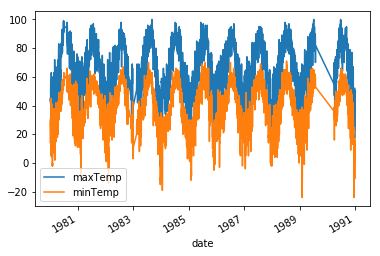

In [164]:
dataClean.plot()

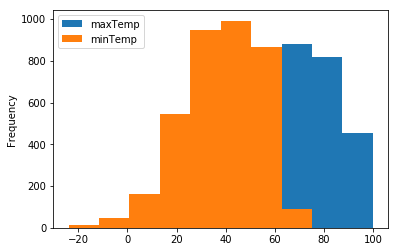

In [167]:
dataClean.plot(kind='hist')

And each column independently

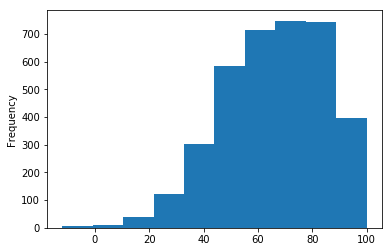

In [170]:
dataClean.maxTemp.plot(kind='hist')

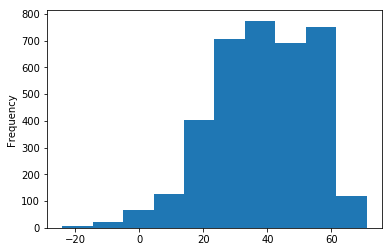

In [171]:
dataClean.minTemp.plot(kind='hist')

### Working with missing or incorrect data

We will cover basics related to data cleaning here. We will not cover every feature within pandas, please find additional information on the [official pandas site](https://pandas.pydata.org/pandas-docs/stable/). Note you will also find lots of information on sites such as stackoverflow, quora, etc., while information on these sites can be very helpful, there is a notable amount of poor advice. If you use these sites please keep in mind problems that can come up with chained assignments (explained below) and be sure to look up specifics of functions listed (eg. what is returned, what parameters do) on the official pandas site. 
 
#### The inplace parameter
For most methods there is an optional boolean parameter, inplace = True/False, in most cases it is set to false. This means that the method creates a new copy of the dataframe. Setting inplace = True will result in pandas adjusting values of the dataframe it is called on. You call these differently, in the inplace=False method, we need to reset the dataframe.

`data.fillna(method = 'ffill', inplace=True)`


| Method                                                | What it does                                                                    |
|-------------------------------------------------------|---------------------------------------------------------------------------------|
| Dataframe.dropna(self,[options])                      | Drop missing values                                                             |
| DataFrame.fillna(self, value, method, [options])      | Fill in missing values with various methods (forward fill, backward fill, etc.) |
| DataFrame.replace(self, to_replace, value, [options]) | Replace one value with another                                                  |
| DataFrame.interpolate(self, method, [options])        | Interpolate with a certain method                                               |

#### Inserting a new column
We can insert a column into a dataframe at a specified location using the insert() function
`DataFrame.insert(self, loc, column, value, [allow_duplicates=False])`

| Method | what it does                                                                        |
|--------|-------------------------------------------------------------------------------------|
| loc    | Integer value for where to insert the new column.                                   |
|   -    | Must be between 0 <= loc <= len(DataFrame.columns)                                  |
| column | The label of the new column name. A string, number, or hashable object              |
| value  | The value(s) to insert. An integer (will be repeated), series, or array-like object |

#### Merging Multiple DataFrames

There are multiple options on how we can join two frames, as shown in the diagrams:

![Example 3](QEDsupergroup/merge.png)

| method                                    | what it does                                                                                                                                          |
|-------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| merge(frame1, frame2,[options])           | Standard joining of multiple dataframes, specify how you want to join and which indexes to keep                                                       |
| DataFrame.join(frame2,[options])          | Uses merge. Use this one when you want to merge on the index. Join columns with other DataFrame either on index or on a key column. Efficiently join multiple DataFrame objects by index at once by passing a list. Defaults to left-join  |                                                                                                                               
| concat([frame1, frame2], axis, [options]) | Concat multiple dataframes along an axis with optional set logic (union, intersection) of tie indexes on other axes. The concat is best understood with examples [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) |

Lets try out a couple of these on multiple data files:

In [4]:
cgm = pd.read_csv('data/cgm.csv')
hr = pd.read_csv('data/hr.csv')
meal = pd.read_csv('data/meal.csv')

print(cgm.head())
print(hr.head())
print(meal.head())

   Id          time value  Unnamed: 3  Unnamed: 4
0   1  3/16/18 0:04   131         NaN         NaN
1   2  3/16/18 0:09   138         NaN         NaN
2   3  3/16/18 0:14   144         NaN         NaN
3   4  3/16/18 0:19   152         NaN         NaN
4   5  3/16/18 0:24   151         NaN         NaN
   patient           time  value
0    52122  3/16/18 17:16     70
1    52122  3/16/18 17:17     90
2    52122  3/16/18 17:17     85
3    52122  3/16/18 17:17     84
4    52122  3/16/18 17:17     83
     Id           time  value  Unnamed: 3  Unnamed: 4  Unnamed: 5
0  1501   3/16/18 0:20      0         NaN         NaN         NaN
1  1502   3/16/18 8:42     60         NaN         NaN         NaN
2  1503  3/16/18 12:00      0         NaN         NaN         NaN
3  1504  3/16/18 13:01      0         NaN         NaN         NaN
4  1505  3/16/18 13:44      0         NaN         NaN         NaN


Lets get rid of the unnamed columns

In [226]:
# If pandas imported some "junk" that we had in the spreadsheet and
# resulted in extra "Unnamed" columns, we can filter for and drop them by using
# text parsing (str.contains())
cgm = cgm.loc[:, ~cgm.columns.str.contains('^Unnamed')]
hr = hr.loc[:, ~hr.columns.str.contains('^Unnamed')]
meal = meal.loc[:, ~meal.columns.str.contains('^Unnamed')]

print(cgm.head())
print(hr.head())
print(meal.head())

   Id          time value
0   1  3/16/18 0:04   131
1   2  3/16/18 0:09   138
2   3  3/16/18 0:14   144
3   4  3/16/18 0:19   152
4   5  3/16/18 0:24   151
   patient           time  value
0    52122  3/16/18 17:16     70
1    52122  3/16/18 17:17     90
2    52122  3/16/18 17:17     85
3    52122  3/16/18 17:17     84
4    52122  3/16/18 17:17     83
     Id           time  value
0  1501   3/16/18 0:20      0
1  1502   3/16/18 8:42     60
2  1503  3/16/18 12:00      0
3  1504  3/16/18 13:01      0
4  1505  3/16/18 13:44      0


In [227]:
#lets rename columns
cgm.rename(columns={"value":"cgm"},inplace=True)
hr.rename(columns={"value":"hr"},inplace=True)
meal.rename(columns={"value":"meal"},inplace=True)

print(cgm.head())
print(hr.head())
print(meal.head())

   Id          time  cgm
0   1  3/16/18 0:04  131
1   2  3/16/18 0:09  138
2   3  3/16/18 0:14  144
3   4  3/16/18 0:19  152
4   5  3/16/18 0:24  151
   patient           time  hr
0    52122  3/16/18 17:16  70
1    52122  3/16/18 17:17  90
2    52122  3/16/18 17:17  85
3    52122  3/16/18 17:17  84
4    52122  3/16/18 17:17  83
     Id           time  meal
0  1501   3/16/18 0:20     0
1  1502   3/16/18 8:42    60
2  1503  3/16/18 12:00     0
3  1504  3/16/18 13:01     0
4  1505  3/16/18 13:44     0


#### Index

As we noted before, data is stored with value-index pairs, and when we combine dataframes, it occurs on the index-level. 

Here we want to align our data (that was taken at different time points) so the times match up. 

First we will convert the `time` column to be of type datetime, then we will set the index of all the dataframes to be `time`.

The datetime object is very useful because we can do things like round easily. 

You can find [additional time series related functionalities here](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#time-series-related), as well as [useful attributes of datetime objects.](https://docs.python.org/2/library/datetime.html)

In [228]:
cgm.insert(len(cgm.columns),'DT',pd.to_datetime(cgm.time))
hr.insert(len(hr.columns),'DT',pd.to_datetime(hr.time))
meal.insert(len(meal.columns),'DT',pd.to_datetime(meal.time))

cgm.time = pd.to_datetime(cgm.time)
hr.time = pd.to_datetime(hr.time)
meal.time = pd.to_datetime(meal.time)

print(cgm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 4 columns):
Id      15634 non-null int64
time    15634 non-null datetime64[ns]
cgm     15634 non-null object
DT      15634 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 488.6+ KB
None


Let's create a rounded time column, rounded to the nearest 5min. 

In [229]:
cgm.insert(len(cgm.columns),'DT5',cgm.DT.dt.round('5min'))
hr.insert(len(hr.columns),'DT5',hr.DT.dt.round('5min'))
meal.insert(len(meal.columns),'DT5',meal.DT.dt.round('5min'))

print(cgm.head())
print(hr.head())
print(meal.head())

   Id                time  cgm                  DT                 DT5
0   1 2018-03-16 00:04:00  131 2018-03-16 00:04:00 2018-03-16 00:05:00
1   2 2018-03-16 00:09:00  138 2018-03-16 00:09:00 2018-03-16 00:10:00
2   3 2018-03-16 00:14:00  144 2018-03-16 00:14:00 2018-03-16 00:15:00
3   4 2018-03-16 00:19:00  152 2018-03-16 00:19:00 2018-03-16 00:20:00
4   5 2018-03-16 00:24:00  151 2018-03-16 00:24:00 2018-03-16 00:25:00
   patient                time  hr                  DT                 DT5
0    52122 2018-03-16 17:16:00  70 2018-03-16 17:16:00 2018-03-16 17:15:00
1    52122 2018-03-16 17:17:00  90 2018-03-16 17:17:00 2018-03-16 17:15:00
2    52122 2018-03-16 17:17:00  85 2018-03-16 17:17:00 2018-03-16 17:15:00
3    52122 2018-03-16 17:17:00  84 2018-03-16 17:17:00 2018-03-16 17:15:00
4    52122 2018-03-16 17:17:00  83 2018-03-16 17:17:00 2018-03-16 17:15:00
     Id                time  meal                  DT                 DT5
0  1501 2018-03-16 00:20:00     0 2018-03-16 00:20

Now we can easily get differences in time between points, and create a new dataframe where we have cleaned data to 5min intervals.

In [230]:
cgm.insert(len(cgm.columns),'DT_diff',cgm.DT5.diff())
hr.insert(len(hr.columns),'DT_diff',hr.DT5.diff())
meal.insert(len(meal.columns),'DT_diff',meal.DT5.diff())

print(cgm.head())

   Id                time  cgm                  DT                 DT5  \
0   1 2018-03-16 00:04:00  131 2018-03-16 00:04:00 2018-03-16 00:05:00   
1   2 2018-03-16 00:09:00  138 2018-03-16 00:09:00 2018-03-16 00:10:00   
2   3 2018-03-16 00:14:00  144 2018-03-16 00:14:00 2018-03-16 00:15:00   
3   4 2018-03-16 00:19:00  152 2018-03-16 00:19:00 2018-03-16 00:20:00   
4   5 2018-03-16 00:24:00  151 2018-03-16 00:24:00 2018-03-16 00:25:00   

   DT_diff  
0      NaT  
1 00:05:00  
2 00:05:00  
3 00:05:00  
4 00:05:00  


### Fixing not-integer data
Before we can group data, we want to ensure values are integers (not objects or a mix of text & number)

Lets check if non-integer values exist:

In [231]:
#first, let's find all the unique elements that cannot be cast to int
uniq = cgm.cgm[~cgm.cgm.str.isnumeric()].unique()
print(uniq) #print them out

#to make it easier, lets lowercase everything
cgm.cgm=cgm.cgm.str.lower()
uniq = cgm.cgm[~cgm.cgm.str.isnumeric()].unique()
print(uniq) #now we just have lower case words, there are fewer unique items

#replace the words with integer values
cgm.cgm.replace('low',40,inplace=True)
cgm.cgm.replace('high',400,inplace=True)

['low' 'Low' 'high' 'LOW']
['low' 'high']


In [232]:
print(cgm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 6 columns):
Id         15634 non-null int64
time       15634 non-null datetime64[ns]
cgm        15634 non-null object
DT         15634 non-null datetime64[ns]
DT5        15634 non-null datetime64[ns]
DT_diff    15633 non-null timedelta64[ns]
dtypes: datetime64[ns](3), int64(1), object(1), timedelta64[ns](1)
memory usage: 732.9+ KB
None


In [234]:
cgm.cgm=cgm.cgm.astype(int)
cgm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 6 columns):
Id         15634 non-null int64
time       15634 non-null datetime64[ns]
cgm        15634 non-null int64
DT         15634 non-null datetime64[ns]
DT5        15634 non-null datetime64[ns]
DT_diff    15633 non-null timedelta64[ns]
dtypes: datetime64[ns](3), int64(2), timedelta64[ns](1)
memory usage: 732.9 KB


In [235]:
hr.hr=hr.hr.astype(int)
meal.meal=meal.meal.astype(int)

### Grouping by value

Pandas is excellent for doing operations such as `grouping` and `pivoting`.

#### Pivoting
We will not do any pivoting in this example, but it is a very useful function.
If you have data where you have lots of different samples all in one file and you want to separate it out by sample, you can do this very easily using the pivot feature. [See this link for more info on pivoting](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

Pivoting allows you to take multiple columns in your data (eg. cgm, meal, hr) and get a resultant frame that has rows of cgm, columns of hr and the values as sums of meal data for those combinations. (example at the end)

#### Groupby
Grouping is similar to pivoting, but they return differentlly *shaped* data. Rather than creating a heiarchy, groupby will take the dimensions given and place them into columns, with rows being combinations of those dimensions.


The pandas groupby allows you to select one column based on another, and perform operations of values that fall into equivalent "groups". [You can read about it more here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)



Now that we have our values as integers, we can create a new data set where we combine on the 5-minute interval and take the mean or sum of values based on the data. Let's go through the steps

In [236]:
roundedCGM = cgm.groupby('DT5')['cgm'].mean()
roundedHR = hr.groupby('DT5')['hr'].mean()
roundedMEAL = meal.groupby('DT5')['meal'].sum()

print(roundedCGM.head())
print(roundedMEAL.head())
print(roundedHR.head())

DT5
2018-03-16 00:05:00    131.0
2018-03-16 00:10:00    138.0
2018-03-16 00:15:00    144.0
2018-03-16 00:20:00    152.0
2018-03-16 00:25:00    151.0
Name: cgm, dtype: float64
DT5
2018-03-16 00:20:00     0
2018-03-16 08:40:00    60
2018-03-16 12:00:00     0
2018-03-16 13:00:00     0
2018-03-16 13:45:00     0
Name: meal, dtype: int64
DT5
2018-03-16 17:15:00     82.571429
2018-03-16 17:30:00     70.000000
2018-03-16 17:35:00     86.300000
2018-03-16 17:40:00    107.461538
2018-03-16 18:20:00     87.500000
Name: hr, dtype: float64


Let's create a large data structure that has lined-up meal, hr, and cgm data!

Notice how the index of each of the rounded series is already the rounded time, so we can easily align based on that. 



In [250]:
#we can combine our dataframes to a list. Note this list has pointers to our dataframes (not copied versions)
listOfFrames = [roundedCGM, roundedHR, roundedMEAL]

#Lets join the frames together with a concatenation
allData = pd.concat(listOfFrames,axis=1) 
#axis 1 means to combine as columns

allData.info()
print(allData.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16115 entries, 2018-03-16 00:05:00 to 2018-05-11 18:05:00
Data columns (total 3 columns):
cgm     15556 non-null float64
hr      12592 non-null float64
meal    340 non-null float64
dtypes: float64(3)
memory usage: 503.6 KB
                       cgm  hr  meal
DT5                                 
2018-03-16 00:05:00  131.0 NaN   NaN
2018-03-16 00:10:00  138.0 NaN   NaN
2018-03-16 00:15:00  144.0 NaN   NaN
2018-03-16 00:20:00  152.0 NaN   0.0
2018-03-16 00:25:00  151.0 NaN   NaN


Now we can fill in the hr with a forward fill, and the meal with zeros

In [251]:
#we can combine our dataframes to a list. Note this list has pointers to our dataframes (not copied versions)
print(allData.hr.isna().sum())
print('*------*')
allData.hr.fillna(method='ffill',inplace=True)
print(allData.hr.isna().sum())

3523
*------*
206


In [252]:
allData.hr.fillna(method='bfill',inplace=True)
print(allData.hr.isna().sum())

0


In [255]:
allData.meal.fillna(0,inplace=True)
print(allData.head())


                       cgm         hr  meal
DT5                                        
2018-03-16 00:05:00  131.0  82.571429   0.0
2018-03-16 00:10:00  138.0  82.571429   0.0
2018-03-16 00:15:00  144.0  82.571429   0.0
2018-03-16 00:20:00  152.0  82.571429   0.0
2018-03-16 00:25:00  151.0  82.571429   0.0


Now suppose we want to drop the row if there is no cgm data

In [256]:
print(allData.cgm.isna().sum())

559


In [258]:
allDataClean = allData.dropna(axis=0,subset=['cgm'])
print(allDataClean.cgm.isna().sum())
print(allDataClean.head())

0
                       cgm         hr  meal
DT5                                        
2018-03-16 00:05:00  131.0  82.571429   0.0
2018-03-16 00:10:00  138.0  82.571429   0.0
2018-03-16 00:15:00  144.0  82.571429   0.0
2018-03-16 00:20:00  152.0  82.571429   0.0
2018-03-16 00:25:00  151.0  82.571429   0.0


And just for anyone wanting a pivot example, here is one. 

In [261]:
pivFrame = pd.pivot_table(allData, index=["cgm"], columns=["hr"], values=["meal"], aggfunc=np.sum)
print(pivFrame.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 363 entries, 40.0 to 400.0
Columns: 8961 entries, (meal, 61.38461538461539) to (meal, 146.6086956521739)
dtypes: float64(8961)
memory usage: 24.8 MB
None


### Resampling Data
Pandas allows for easy re-sampling of time series data. This is similar to groupby, but allows you to operate on time-stamps more easily.

You can read [more details here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) and [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)

Here is a basic example:

In [264]:
resampData = allData.resample('20Min').max()
resampData.head()

,cgm,hr,meal
DT5,,,
2018-03-16 00:00:00,144.0,82.571429,0.0
2018-03-16 00:20:00,153.0,82.571429,0.0
2018-03-16 00:40:00,172.0,82.571429,0.0
2018-03-16 01:00:00,178.0,82.571429,0.0
2018-03-16 01:20:00,179.0,82.571429,0.0


## 2.0 Relations in Data

### Covariance
You can easily take the covariance between variables using the numpy function `cov`. 

The result is a matrix where the diagonal of the matrix contains the covariance between each variable and itself. The other values in the matrix represent the covariance between the two variables.


In [25]:
np.cov(dataClean.maxTemp, dataClean.minTemp)

array([[344.20302826, 263.2662733 ],
       [263.2662733 , 245.45834983]])

### Correlation 
To get the correlation (pearson's correlation) we use the `personr` function from the `scipy.stats` module. We find high and low temperatures to be highly correlated (not surprising)

In [26]:
from scipy.stats import pearsonr

corr, _ = pearsonr(dataClean.maxTemp, dataClean.minTemp)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.906


### Autocorrelation 
In order to get a sense of how correlated our data set is, we can take the correlation of each point with the point n-steps away from it. 

The autocorrelation function does just this, without us having to code a loop. It takes the correlation of each point in the data set, with respect to the point n-steps away from it (behind). 

Note, you can plot autocorrelation using the pandas module (function `pandas.plotting.autocorrelation_plot()`), but it is a very high level function which does not allow you to easily change parameters such as the number of lags shown. 

For this reason, we will use the `statsmodels` module, in particular the [time series analysis sub-module.](https://www.statsmodels.org/stable/tsa.html#)

In [27]:
from matplotlib import pyplot as plt
import statsmodels.tsa as tsa
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataClean.maxTemp)

plt.show()

<Figure size 640x480 with 1 Axes>

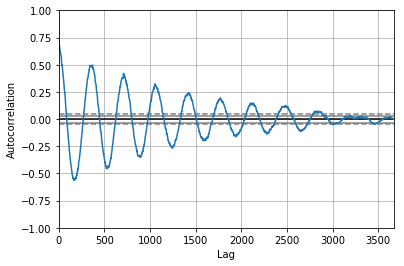

In [28]:
pd.plotting.autocorrelation_plot(dataClean.maxTemp)
plt.show()

The cone shows the 95% confidence interval, meaning that points outside of the cone are likely correlated. 

Exact values here are tough to see, so we can minimize to the first 100 points.

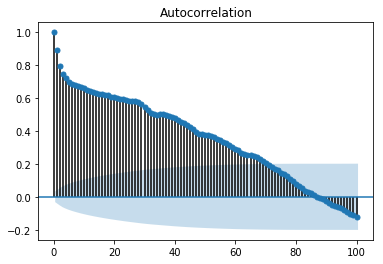

In [29]:
plot_acf(dataClean.maxTemp,lags=100)

plt.show()

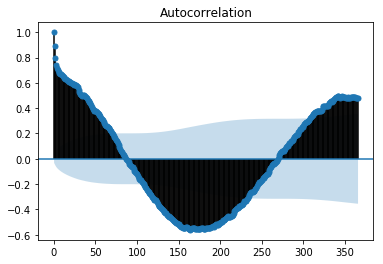

In [30]:
plot_acf(dataClean.maxTemp,lags=365)

plt.show()

Note how difference our results look if we minimize the length of the trace. This highlights how this metric is highly dependent on your data & limited data can show every different results.

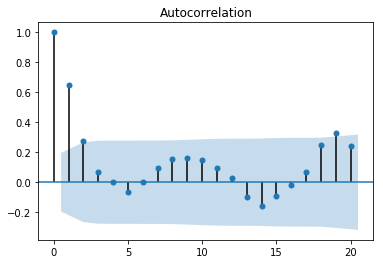

In [31]:
plot_acf(dataClean.maxTemp[0:100])
plt.show()

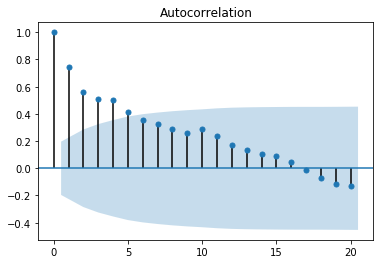

<Figure size 432x288 with 0 Axes>

In [32]:
plot_acf(dataClean.maxTemp[400:500])

fig=plt.figure()

### Partial Autocorrelation
The autocorrelation for an observation and and the n-lag can result from a mutual linear dependence on other variables, direct or indirect correlation which results in confounding. These indirect correlations are a linear function of the correlation of the observation, with observations at 1-lag to (n-1)-lag time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. 

Specifically, the partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

We can use the `plot_pacf` function from the same `statsmodels.graphics.tsaplots` module we found the autocorrelation function in.


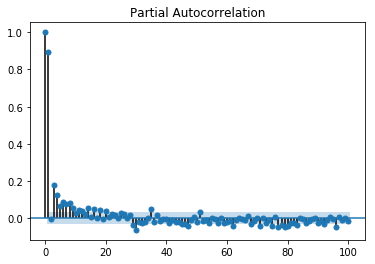

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(dataClean.maxTemp, lags=100)

plt.show()

We want to look for the last point above the blue confidence interval. 

Notice how only about 10 points become important now. 

## Using ACF and PACF in modeling

ACF and PACF become useful when we are considering modeling approaches, in particular the use of autoregressive and moving average models (or the combined ARMA model). 

For these models, the theoretical ACF and PACF of each model is know:


| Conditional Mean Model | ACF                   | PACF                  |
|:----------------------:|:---------------------:|:---------------------:|
| AR(p)                  | Tails off gradually   | Cuts off after p lags |
| MA(q)                  | Cuts off after q lags | Tails off gradually   |
| ARMA(p,q)              | Tails off gradually   | Tails off gradually   |

We can see that an AR model would work well for creating a model of daily temps. 

But how do we use the ACF and PACF in these models?

If the data is generated by an autoregressive process of order p, the values of the sample partial autocorrelation sequence for lags greater than p follow a normal distribution `N(0,1/N)`, where N is the length of the time series.

We can look at PACF more closely for the max temp example.

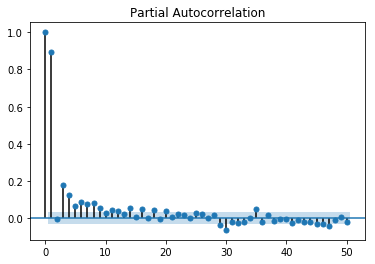

In [34]:
plot_pacf(dataClean.maxTemp, lags=50)

plt.show()

Let's try with 4 lags, and print the AIC and  BIC for the resultant model. 

Each of these information criteria are penalized likelihood criteria, where the models are penalized for overfitting (too many parameters).

if L is the max value of the likelihood function of the model ([read more about max likelihood here](https://online.stat.psu.edu/stat414/node/191/)), then: 

- AIC = 2k-2ln(L) 
- BIC = ln(n)k-2ln(L)

Here n is the number of observations, and k is the number of parameters in the model.

In general, AIC and BIC are just metrics which can be useful in model selection but will not give a definite answer. 
[You can read more here](https://www.methodology.psu.edu/resources/AIC-vs-BIC/)

In [41]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

out = 'AIC: {0:0.3f}, BIC: {1:0.3f}'

res = AutoReg(dataClean.maxTemp, lags=4).fit()
print(out.format(res.aic, res.bic))

#we can get the parameters too
print(res.params)


AIC: 4.206, BIC: 4.216
intercept     5.094335
maxTemp.L1    0.874853
maxTemp.L2   -0.146657
maxTemp.L3    0.069874
maxTemp.L4    0.124343
dtype: float64


We can see the relative importance of each parameter by looking at the coefficients. 

Note L3 is pretty small, it was also not very significant in the PACF. 

Lets try with a bunch of lags, and evaluate the results

In [42]:
res = AutoReg(dataClean.maxTemp,lags=[1,2,4,5,6,7,8,9,10,30]).fit()

print(out.format(res.aic, res.bic))
print(res.params)

AIC: 4.173, BIC: 4.194
intercept      3.365795
maxTemp.L1     0.828191
maxTemp.L2    -0.118965
maxTemp.L4     0.103189
maxTemp.L5    -0.013756
maxTemp.L6     0.028704
maxTemp.L7     0.010638
maxTemp.L8     0.045049
maxTemp.L9     0.027188
maxTemp.L10    0.032255
maxTemp.L30    0.006510
dtype: float64


Based on these results, AIC and BIC barely went down. 
I would pick a model with just the lags L1, L3, L4. But this is entirely up to you.

There is a `ar_select_order` function, which can help you pick lags as well. We supply as inputs the max lag, as well as the information criteria to use ('aic', 'hqic', 'bic'}). BIC is standard. 

In [43]:
from statsmodels.tsa.ar_model import ar_select_order

modOrd = ar_select_order(dataClean.maxTemp, maxlag = 30, ic='bic') 

modOrd.ar_lags

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
modOrd.bic


{(1, 2, 3, 4, 5, 6, 7, 8, 9): 4.1877833809095435,
 (1, 2, 3, 4, 5, 6, 7, 8): 4.188502736530902,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): 4.188745650018009,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): 4.188925131351663,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): 4.189236393515314,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14): 4.189477216221576,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13): 4.190847320482519,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16): 4.1914995287058945,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15): 4.1915969968909925,
 (1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17): 4.193749947118868,
 (1, 2, 3, 4, 5, 6, 7): 4.19391908796782,
 (1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18): 4.19400954403723,
 (1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19): 4.196251824702176,
 (1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10

In [57]:
res = AutoReg(dataClean.maxTemp,lags=[1,2,4]).fit()

print(out.format(res.aic, res.bic))

print(res.summary())

AIC: 4.208, BIC: 4.217
                            AutoReg Model Results                             
Dep. Variable:                maxTemp   No. Observations:                 3668
Model:              Restr. AutoReg(4)   Log Likelihood              -12903.416
Method:               Conditional MLE   S.D. of innovations              8.189
Date:                Sun, 01 Mar 2020   AIC                              4.208
Time:                        19:32:22   BIC                              4.217
Sample:                             4   HQIC                             4.211
                                 3668                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.1607      0.532      9.699      0.000       4.118       6.204
maxTemp.L1     0.8683      0.016     53.328      0.000       0.836       0.900
maxTemp.L2    -0.1067      0.

/Users/taisakushner/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


No handles with labels found to put in legend.


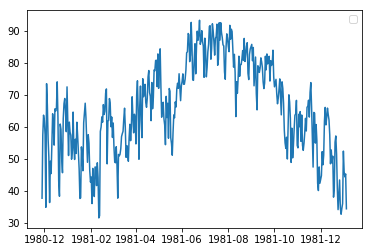

In [64]:
fig = res.plot_predict(300, 700)

### Evaluating the Model
We can consider how well the model fits to actual values, as well as patterns that exist in the residuals. 

First, lets find the residuals between the predicted and actual values, and plot them.

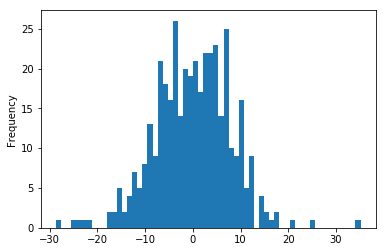

In [81]:
predVals = res.predict(300,700)
Residuals = dataClean.maxTemp - predVals

#now we can drop the NaN values
Residuals.dropna(inplace=True)

#and plot the residuals
Residuals.plot.hist(bins=60)

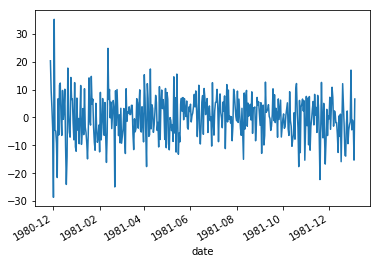

In [83]:
Residuals.plot()

Next, let's evaluate the residuals. 

Are the residuals correlated in time? Are they correlated with some third (unmodeled) parameter?


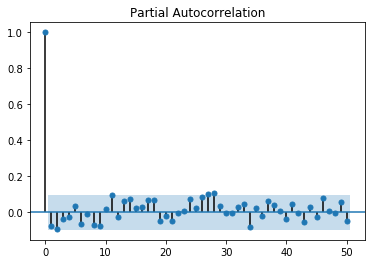

In [265]:
plot_pacf(Residuals, lags=50)

plt.show()

Nice! We don't have much correlation past the value & itself (to be expected).

We can see if there are any patterns by month, date, if we had other (potentially leftout) variables, we could see if there are patterns between residuals and those variables. 

In [270]:

Residuals.resample('M').mean()

date
1980-11-30    11.034593
1980-12-31    -0.660563
1981-01-31    -1.893623
1981-02-28    -0.254251
1981-03-31    -0.888032
1981-04-30     1.219430
1981-05-31     0.095476
1981-06-30     2.105402
1981-07-31     1.763613
1981-08-31     1.262060
1981-09-30     0.541468
1981-10-31    -1.089592
1981-11-30    -1.223262
1981-12-31    -1.278583
1982-01-31    -3.015434
Freq: M, dtype: float64

In [88]:
arma_mod = sm.tsa.ARMA(dataClean.maxTemp, order=(3,4))
arma_res = arma_mod.fit(trend='c', disp=-1) 
#trend 'c' means we want a constant, 'nc' means no constant. disp < 0 means no output

print(arma_res.summary())

/Users/taisakushner/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                maxTemp   No. Observations:                 3668
Model:                     ARMA(3, 4)   Log Likelihood              -12848.217
Method:                       css-mle   S.D. of innovations              8.030
Date:                Sun, 01 Mar 2020   AIC                          25712.433
Time:                        19:59:12   BIC                          25762.093
Sample:                             0   HQIC                         25730.114
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.maxTemp     1.0881      0.022     49.198      0.000       1.045       1.131
ar.L2.maxTemp     0.1394      0.081      1.717      0.086      -0.020       0.298
ar.L3.maxTemp    -0.2278      0.075     

We can plot the model prediction versus actual values:

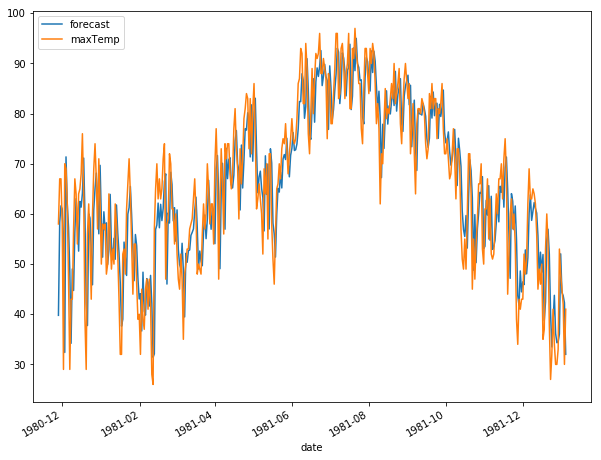

In [89]:
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(start=300, end=700, ax=ax)
legend = ax.legend(loc='upper left')



Note how the smoothing (moving average) serves to temper extreme values.

In [146]:
cgm30 = cgm.iloc[::6, :]

print(cgm.head())
print(cgm30.head())

              Id  value
time                   
3/16/18 0:04   1    131
3/16/18 0:09   2    138
3/16/18 0:14   3    144
3/16/18 0:19   4    152
3/16/18 0:24   5    151
              Id  value
time                   
3/16/18 0:04   1    131
3/16/18 0:34   7    153
3/16/18 1:04  13    177
3/16/18 1:34  19    176
3/16/18 2:04  25    166


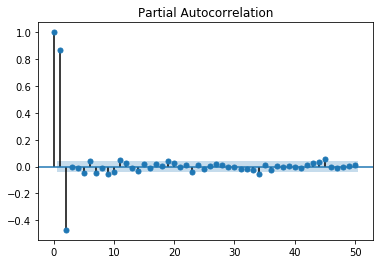

In [147]:
plot_pacf(cgm30.value, lags=50)
plt.show()

In [149]:
arma_mod = sm.tsa.ARMA(cgm30.value, order=(3,1))
arma_res = arma_mod.fit(trend='c', disp=-1)
print(arma_res.summary())

/Users/taisakushner/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                 2606
Model:                     ARMA(3, 1)   Log Likelihood              -11908.510
Method:                       css-mle   S.D. of innovations             23.344
Date:                Sun, 01 Mar 2020   AIC                          23829.020
Time:                        20:57:04   BIC                          23864.213
Sample:                             0   HQIC                         23841.770
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         156.1031      2.323     67.186      0.000     151.549     160.657
ar.L1.value     0.4362      0.107      4.080      0.000       0.227       0.646
ar.L2.value     0.6131      0.132      4.658    